In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
from google.colab import files
up = files.upload()

Saving Instagram-Reach.csv to Instagram-Reach.csv


In [ ]:
df = pd.read_csv('Instagram-Reach.csv')
df.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [ ]:
df.dtypes

Date               object
Instagram reach     int64
dtype: object

In [ ]:
df = pd.read_csv('Instagram-Reach.csv',parse_dates=['Date'],index_col='Date')

In [ ]:
df.head(5)

,Instagram reach
Date,
2022-04-01,7620
2022-04-02,12859
2022-04-03,16008
2022-04-04,24349
2022-04-05,20532


In [ ]:
df.loc['2022-04-04']

Instagram reach    24349
Name: 2022-04-04 00:00:00, dtype: int64

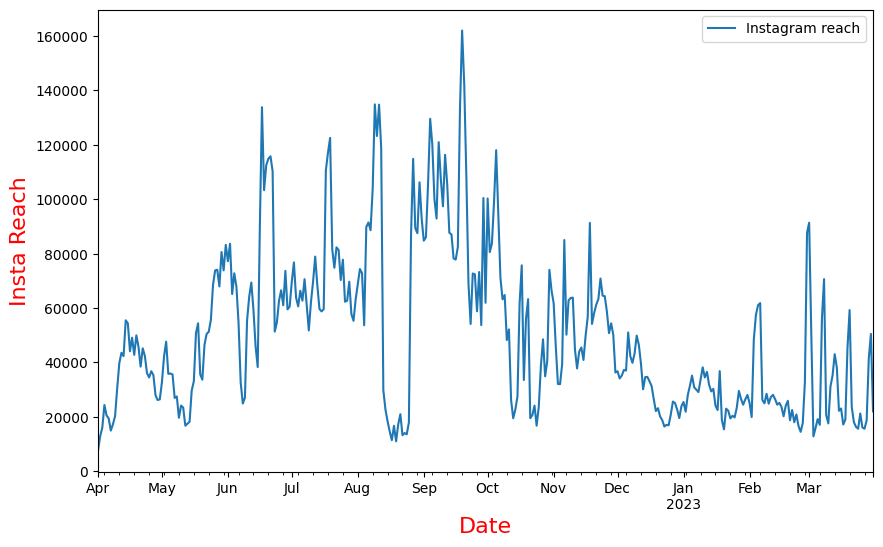

In [ ]:
from pylab import rcParams #increase the fig size
rcParams['figure.figsize']=10,6
df.plot()
plt.ylabel('Insta Reach',size=16,color='red')
plt.xlabel('Date',size=16,color='red')
plt.show()

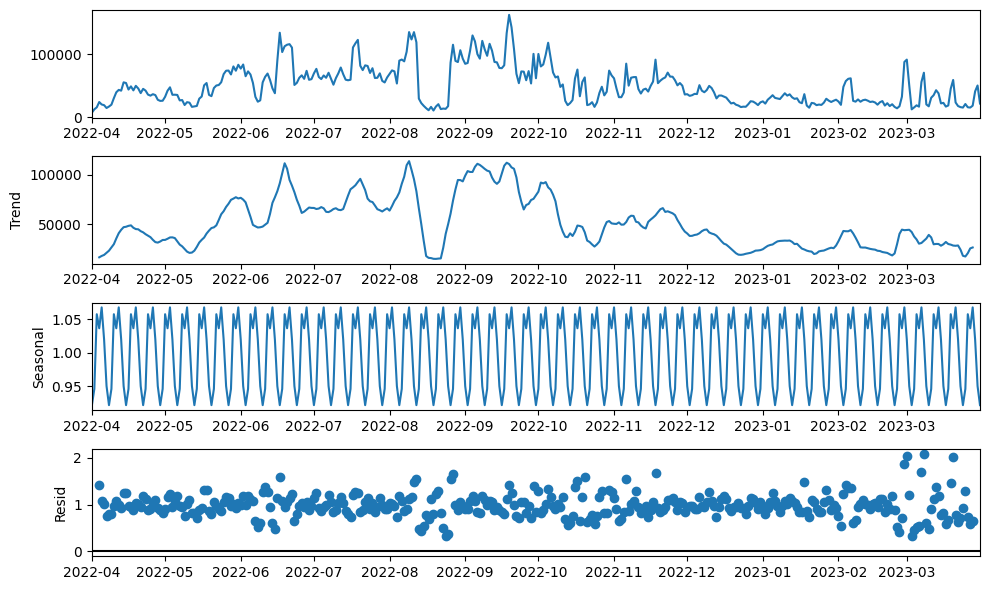

In [ ]:
#decomposing time series multiplicatively
df_mul_decom = seasonal_decompose(df,model = "multiplicative")
df_mul_decom.plot()
plt.show()

In [ ]:
#log transformation
df_log = df.copy()

In [ ]:
df_log['Instagram_reach'] = np.log(df)

In [ ]:
df_log.Instagram_reach

Date
2022-04-01     8.938532
2022-04-02     9.461799
2022-04-03     9.680844
2022-04-04    10.100246
2022-04-05     9.929740
                ...    
2023-03-27     9.656435
2023-03-28     9.833333
2023-03-29    10.627115
2023-03-30    10.829531
2023-03-31     9.999434
Name: Instagram_reach, Length: 365, dtype: float64

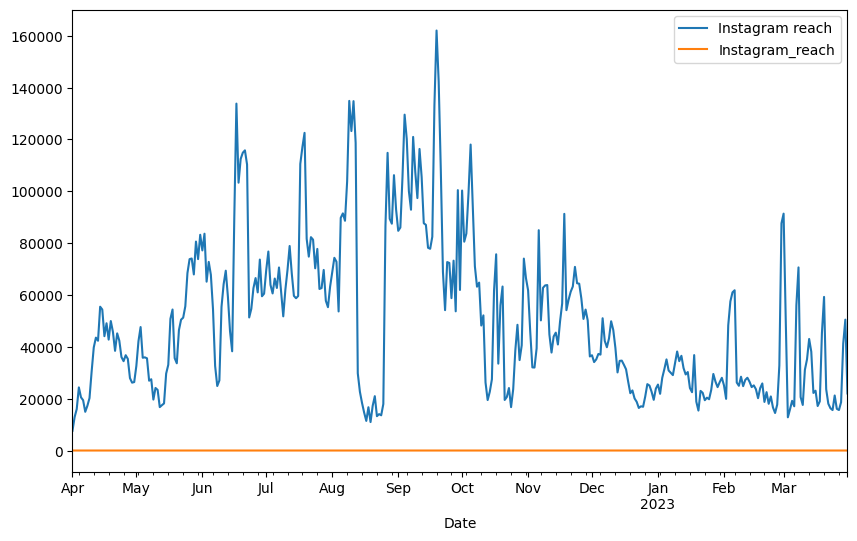

In [ ]:
#plot log series
df_log.plot()
plt.show()

<Axes: xlabel='Date'>

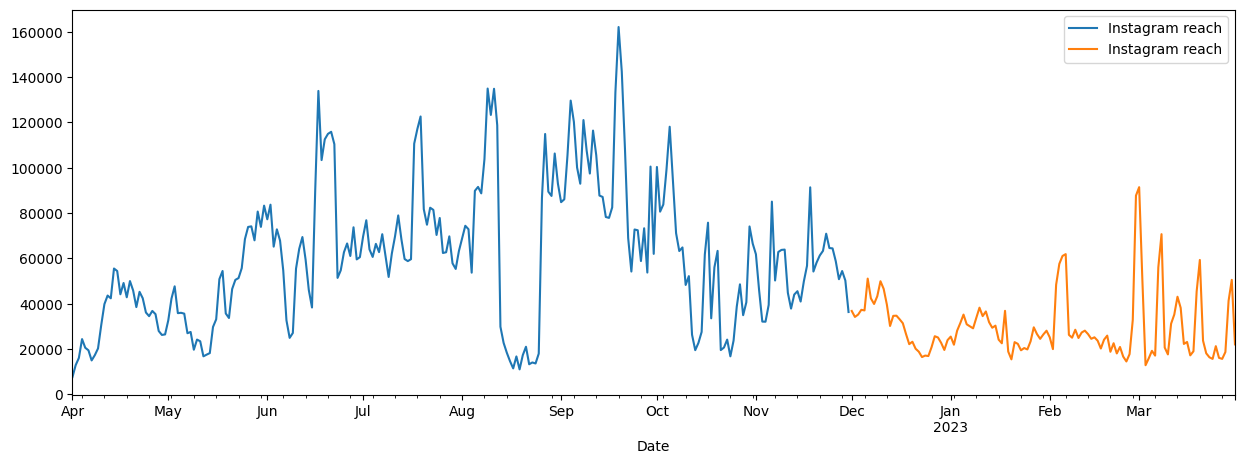

In [ ]:
#train test split
train = df.loc[df.index < '12-01-2022']
test = df.loc[df.index >= '12-01-2022']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label='Training set')
test.plot(ax=ax, label='testing set')

In [ ]:
#feature selection
def create_feature(df):
  df['dayofweek'] = df.index.dayofweek
  df['quarter'] = df.index.quarter
  df['month'] = df.index.month
  df['dayofyear'] = df.index.dayofyear
  return df

df = create_feature(df)
print(df)

            Instagram reach  dayofweek  quarter  month  dayofyear
Date                                                             
2022-04-01             7620          4        2      4         91
2022-04-02            12859          5        2      4         92
2022-04-03            16008          6        2      4         93
2022-04-04            24349          0        2      4         94
2022-04-05            20532          1        2      4         95
...                     ...        ...      ...    ...        ...
2023-03-27            15622          0        1      3         86
2023-03-28            18645          1        1      3         87
2023-03-29            41238          2        1      3         88
2023-03-30            50490          3        1      3         89
2023-03-31            22014          4        1      3         90

[365 rows x 5 columns]


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
train = create_feature(train)
test = create_feature(test)

<ipython-input-14-4f4ff34f3b01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
<ipython-input-14-4f4ff34f3b01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'] = df.index.quarter
<ipython-input-14-4f4ff34f3b01>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
df.columns

Index(['Instagram reach', 'dayofweek', 'quarter', 'month', 'dayofyear'], dtype='object')

In [ ]:
features = ['dayofweek', 'quarter', 'month','dayofyear']
target = ['Instagram reach']

In [ ]:
x_train = train[features]
y_train = train[target]

x_test = test[features]
y_test = test[target]

In [ ]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50)
reg.fit(x_train,y_train,
        eval_set = [(x_train, y_train),(x_test, y_test)],
        verbose = 100)

[0]	validation_0-rmse:49720.18746	validation_1-rmse:29149.54956
[64]	validation_0-rmse:1193.44891	validation_1-rmse:22189.83847


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
pd.DataFrame(reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])

,importance
dayofweek,0.042633
quarter,0.133005
month,0.098724
dayofyear,0.725638


In [ ]:
#pip install fi

  Preparing metadata (setup.py) ... done
  Created wheel for fi: filename=fi-0.0.2-py3-none-any.whl size=1317 sha256=edfaaeeeceac75b612f7fae50617731f23196022def960999858440d51d3a900
  Stored in directory: /root/.cache/pip/wheels/ab/37/f0/e3e3f6edfad1e5eab467667de40a095e9e29ca8d0be62433dd
Successfully built fi


In [ ]:
reg.predict(x_test) #predicted Values..

array([38797.25 , 38797.25 , 37945.207, 39279.812, 38671.977, 38179.43 ,
       38797.25 , 38797.25 , 38797.25 , 37945.207, 39279.812, 38671.977,
       38179.43 , 38797.25 , 38797.25 , 38797.25 , 37945.207, 39279.812,
       38671.977, 38179.43 , 38797.25 , 38797.25 , 38797.25 , 37945.207,
       39279.812, 38671.977, 38179.43 , 38797.25 , 38797.25 , 38797.25 ,
       37945.207,  9419.944, 12577.823, 13013.274, 11770.591,  8946.123,
        9261.479,  9261.479,  9419.944, 12577.823, 13013.274, 11770.591,
        8946.123,  9261.479,  9261.479,  9419.944, 12577.823, 13013.274,
       11770.591,  8946.123,  9261.479,  9261.479,  9419.944, 12577.823,
       13013.274, 11770.591,  8946.123,  9261.479,  9261.479,  9419.944,
       12577.823, 13013.274, 11770.591,  8946.123,  9261.479,  9261.479,
        9419.944, 12577.823, 13013.274, 11770.591,  8946.123,  9261.479,
        9261.479,  9419.944, 12577.823, 13013.274, 11770.591,  8946.123,
        9261.479,  9261.479,  9419.944, 12577.823, 

In [ ]:
test['prediction'] = reg.predict(x_test)

<ipython-input-24-10752091d637>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(x_test)


In [ ]:
df = df.merge(test[['prediction']], how='left',left_index = True, right_index = True)
df

,Instagram reach,dayofweek,quarter,month,dayofyear,prediction
Date,,,,,,
2022-04-01,7620,4,2,4,91,NaN
2022-04-02,12859,5,2,4,92,NaN
2022-04-03,16008,6,2,4,93,NaN
2022-04-04,24349,0,2,4,94,NaN
2022-04-05,20532,1,2,4,95,NaN
...,...,...,...,...,...,...
2023-03-27,15622,0,1,3,86,12577.823242
2023-03-28,18645,1,1,3,87,13013.274414
2023-03-29,41238,2,1,3,88,11770.590820


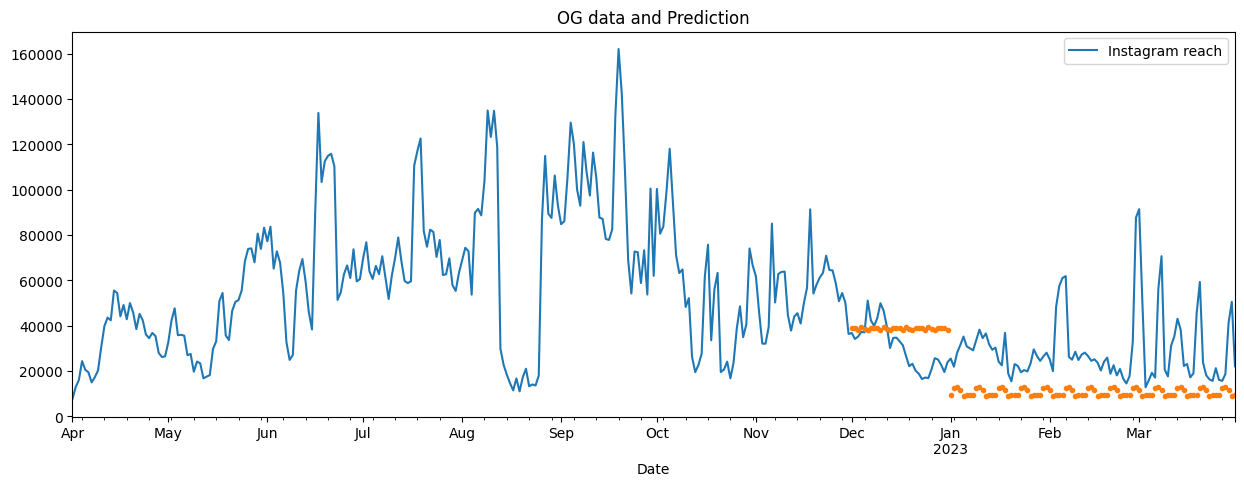

In [ ]:
ax = df[['Instagram reach']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax , style='.')
ax.set_title("OG data and Prediction")
plt.show()

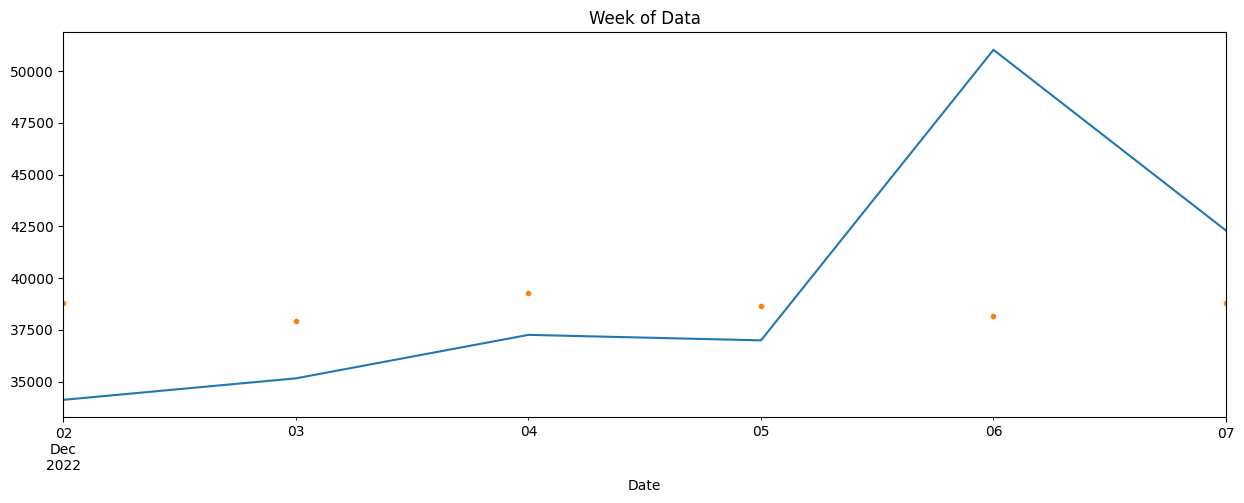

In [ ]:
ax = df.loc[(df.index > '12-01-2022') & (df.index < '12-08-2022')]['Instagram reach'].plot(figsize = (15,5), title='Week of Data')
df.loc[(df.index > '12-01-2022') & (df.index < '12-08-2022')]['prediction'].plot(style='.')
plt.show()